# **Employee Turnover Analytics**

-----------------------------
## **Context**
-----------------------------

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.
Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company. 

-----------------------------
## **Objectives**
-----------------------------

1.	Perform data quality check by checking for missing values if any.
2.	Understand what factors contributed most to employee turnover by EDA.
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
4.	Handle the left Class Imbalance using SMOTE technique.
5.	Perform k-fold cross-validation model training and evaluate performance. 
6.	Identify the best model and justify the evaluation metrics used. 
7.	Suggest various retention strategies for targeted employees.

-----------------------------
## **Dataset**
-----------------------------

- **satisfaction_level	:** Satisfaction level at the job of an employee

- **last_evaluation :**	Rating between 0 to 1, received by an employee at his last evaluation

- **number_project :** Number of projects, an employee involved in

- **average_monthly_hours :** Average number of hours in a month, spent by an employee at office

- **time_spend_company :** Number of years spent in the company

- **Work_accident :** 0 - no accident during employee stay, 1 - accident during employee stay

- **left :** 0 indicates employee stays in the company, 1 indicates - employee left the company

- **promotion_last_5years :** Number of promotions in his stay

- **Department :** Department, an employee belongs to

- **salary :** Salary in USD

-----------------------------------
## **Analysis Steps to Perform**
-----------------------------------

1.	Perform data quality check by checking for missing values if any.
2.	Understand what factors contributed most to employee turnover by EDA.

    2.1. Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.

    2.2. Draw the distribution plot of:

            - Employee Satisfaction (use column satisfaction_level)
            - Employee Evaluation (use column last_evaluation)
            - Employee Average Monthly Hours (use column average_monthly_hours)

    2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.
    
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.

    3.1.	Choose columns satisfaction_level, last_evaluation and left.

    3.2.	Do KMeans clustering of employees who left the company into 3 clusters.

    3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

4.	Handle the left Class Imbalance using SMOTE technique.

    4.1.	Pre-Process the data by converting categorical columns to numerical columns by

            - Separating categorical variables and numeric variables.
            - Applying get_dummies() to the categorical variables.
            - Combining categorical variables and numeric variables.
 
    4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

    4.3.	Over-sample the train dataset using SMOTE technique from the imblearn module (`from imblearn.over_sampling import SMOTE`).

5.	Perform 5-Fold cross-validation model training and evaluate performance.

    5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.

    5.2.	Train a Gradient Boosting model and apply the 5-Fold CV and plot the classification report.

    5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

6.	Identify the best model and justify the evaluation metrics used.

    6.1.	Find the ROC/AUC for each model and plot the ROC curve.

    6.2.	Find the confusion matrix for each of the models.

    6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?

7.	Suggest various retention strategies for targeted employees.

    7.1.	Using the best model, predict the probability of employee turnover in the test data.

    7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

            - Safe Zone (Green) (Score < 20%)
            - Low Risk Zone (Yellow) (20% < Score < 60%)
            - Medium Risk Zone (Orange) (60% < Score < 90%)
            - High Risk Zone (Red) (Score > 90%).



### **Setup: Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Define a seed value for consistency
RANDOM_STATE = 123  

# Define the cross-validation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

### **Load the dataset**

In [2]:
data_df = pd.read_excel('1688640705_hr_comma_sep.xlsx')  # Update the path to where your dataset is stored

# Rename the 'average_montly_hours' column to 'average_monthly_hours'
data_df = data_df.rename(columns={'average_montly_hours': 'average_monthly_hours'})

data_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data_df.tail()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


### **1. Perform data quality check by checking for missing values.**

In [4]:
# Check for any missing values in the dataset

data_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
data_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
data_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


### **2. Understand what factors contributed most to employee turnover by EDA**

#### **2.1. Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.**

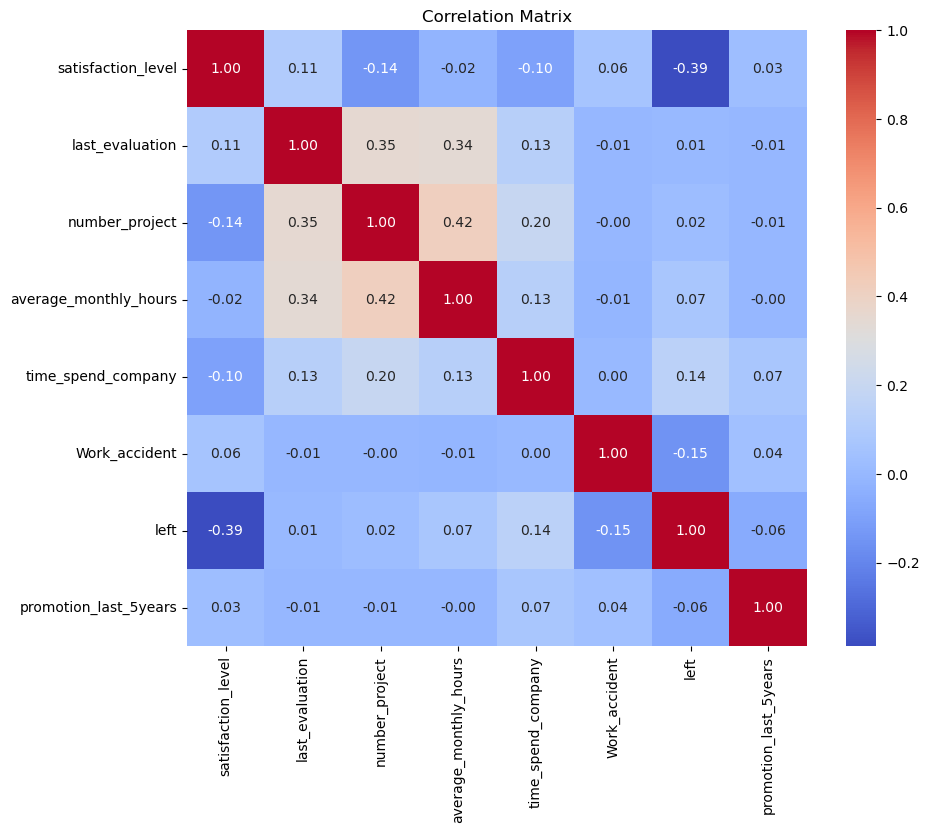

In [8]:
# Create new df with only numerical columns
data_numerical_df = data_df.select_dtypes(exclude=['object'])

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data_numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### **2.2. Draw the distribution plot of:**

- Employee Satisfaction (use column satisfaction_level)
- Employee Evaluation (use column last_evaluation)
- Employee Average Monthly Hours (use column average_monthly_hours)


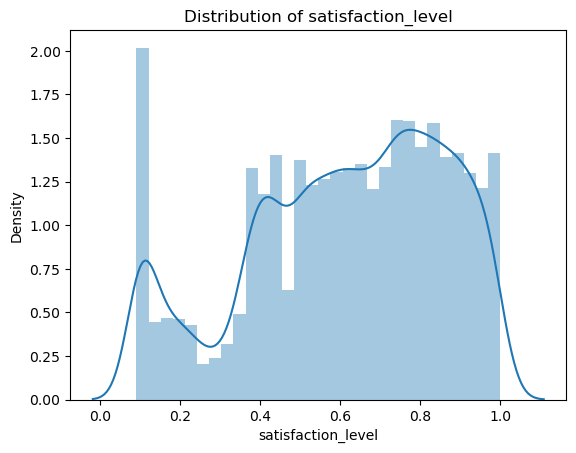

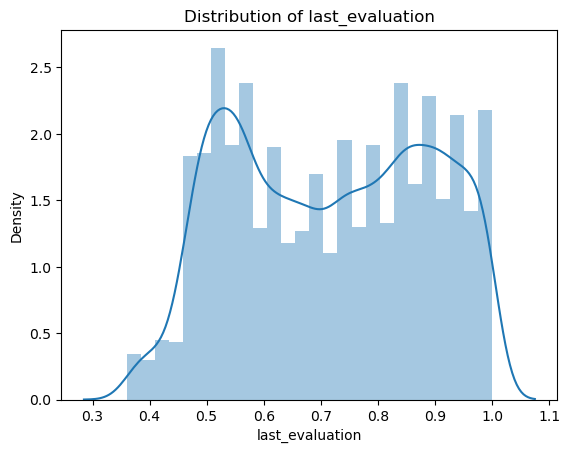

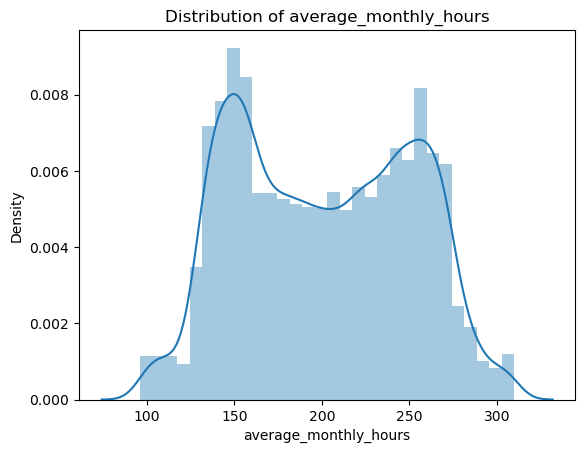

In [9]:
# Distribution plots
for column in ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']:
    sns.distplot(data_numerical_df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

#### **2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left) and give your inferences from the plot**

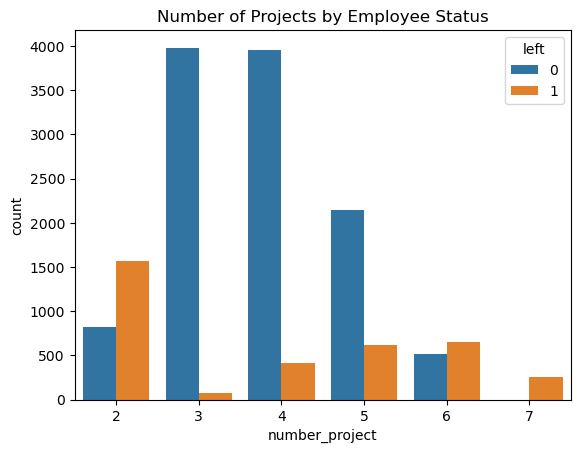

In [10]:
# Bar plot for number of projects by employee status
sns.countplot(x='number_project', hue='left', data=data_numerical_df)
plt.title('Number of Projects by Employee Status')
plt.show()

##### **Observations/Inferences**
Based on the bar plot of the Employee Project Count comparing employees who left and those who stayed in the organization, several inferences can be made:

1.	Moderate Workload is Preferable: Employees handling 3 or 4 projects are more likely to stay with the organization. This range might represent an optimal workload where employees feel challenged yet not overwhelmed.

2.	High Turnover with Low and High Project Counts:
	- Employees with only 2 projects had a higher likelihood to leave than those with 3 or 4 projects. This might suggest that these employees feel underutilized or not sufficiently challenged.
	- Similarly, employees with 5 or more projects show increasing rates of leaving, particularly those with 6 or 7 projects. This suggests that a very high workload could be leading to burnout and dissatisfaction.

3.	Peak Retention at 3 and 4 Projects: The majority of employees who stayed are in the 3 or 4 projects category, indicating these are likely comfortable, sustainable workloads that contribute to employee satisfaction and retention.

4.	Project Overload and Burnout: The sharp increase in the proportion of employees leaving who have 6 or 7 projects could be an indicator of burnout due to overload. This is a critical area for HR to address, perhaps by redistributing workload or providing additional support.

5.	Risk Management: Employees at the extremes (either too few or too many projects) are at higher risk of turnover. Tailored interventions, such as career development opportunities for those with fewer projects and workload management for those with many, could be effective retention strategies.

This plot clearly illustrates the importance of balancing employee workload to enhance satisfaction and retention. Organizations might consider these insights to adjust project assignments or to implement support mechanisms for those handling high numbers of projects.

### **3. Perform clustering of Employees who left based on their satisfaction and evaluation**

#### **3.1.	Choose columns satisfaction_level, last_evaluation and left**

In [11]:
# Selecting employees who left
left_employees_df = data_df[data_df['left'] == 1]

#### **3.2.	Do KMeans clustering of employees who left the company into 3 clusters.**

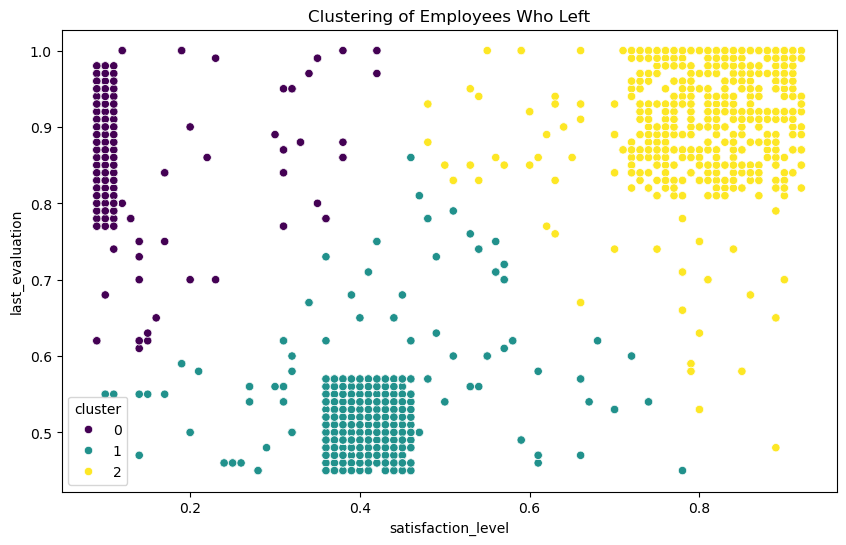

In [12]:
# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE)
clusters = kmeans.fit_predict(left_employees_df[['satisfaction_level', 'last_evaluation']])
left_employees_df['cluster'] = clusters

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employees_df, palette='viridis')
plt.title('Clustering of Employees Who Left')
plt.show()

#### **3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters**

The scatterplot displaying the clustering of employees who left the organization based on their last evaluation and satisfaction level reveals three distinct clusters. Let’s analyze each:

**Cluster 0 (Purple Dots)**

- *Characteristics:* Located with low to moderate satisfaction levels (around 0.4 to 0.6) and varying last evaluation scores (mostly 0.5 to 0.8).
- *Inference:* This cluster appears to consist of a mix of moderately satisfied and evaluated employees. Their reasons for leaving could be diverse and might include lack of growth opportunities, compensation issues, or a desire for a change in work environment. Interventions for this group might need to be more personalized based on individual circumstances.

**Cluster 1 (Yellow Dots)**

- *Characteristics:* This cluster is characterized by low satisfaction levels (around 0.1 to 0.2) and moderate last evaluation scores (around 0.6 to 0.8).
- *Inference:* Employees in this cluster are likely disillusioned or unhappy despite receiving fairly reasonable evaluation scores. This could indicate a misalignment between their expectations or needs and what the company provides. They might feel underappreciated or that their work does not lead to satisfactory rewards.

**Cluster 2 (Cyan Dots)**

- *Characteristics:* This cluster groups employees with high last evaluation scores (close to 1.0) and high satisfaction levels (around 0.8 to 1.0).
- *Inference:* These employees are both highly satisfied and highly evaluated, suggesting they are well-aligned with the company’s goals and are performing effectively. Their departure might be a significant loss for the company, possibly driven by external opportunities rather than internal dissatisfaction. Retention efforts should be strong with this group, as they are likely top performers.

**Overall Strategy Implications:**

- *Cluster 0:* Conducting exit interviews or feedback sessions to understand their diverse needs and address them may help reduce turnover.
- *Cluster 1:* Management needs to explore ways to improve the work environment and ensure that contributions are recognized and rewarded properly.
- *Cluster 2:* Offering career development opportunities, competitive compensation, and recognizing their contributions could help retain these high-value employees.

Each cluster shows a unique set of needs and characteristics, and thus, tailored strategies are required to address the specific reasons behind their turnover. Recognizing these patterns can help the organization take proactive measures to improve employee satisfaction and retention.

### **4.	Handle the left Class Imbalance using SMOTE technique**

#### **4.1.	Pre-Process the data by converting categorical columns to numerical columns by:**

- Separating categorical variables and numeric variables.
- Applying get_dummies() to the categorical variables.
- Combining categorical variables and numeric variables.

In [13]:
# Preprocessing Data
numeric_features_df = data_df.select_dtypes(include=['int64', 'float64'])
categorical_features_df = data_df.select_dtypes(include=['object'])

# Applying pd.get_dummies() to categorical variables
categorical_encoded_df = pd.get_dummies(categorical_features_df)

# Combining encoded categorical data with numeric data
features_df = pd.concat([numeric_features_df, categorical_encoded_df], axis=1)


#### **4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123**

In [14]:
# Stratified Split
X = features_df.drop('left', axis=1)  # Assuming 'left' is the target variable
y = data_df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y)

print(f'Training set shape: {X_train.shape}')
print(f'Training labels distribution: {np.bincount(y_train)}')

Training set shape: (11999, 20)
Training labels distribution: [9142 2857]


#### **4.3.	Over-sample the train dataset using SMOTE technique from the `imblearn` module**

In [15]:
# Applying SMOTE
smote = SMOTE(random_state=RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'Training set shape after SMOTE: {X_train_smote.shape}')
print(f'Training labels distribution after SMOTE: {np.bincount(y_train_smote)}')

Training set shape after SMOTE: (18284, 20)
Training labels distribution after SMOTE: [9142 9142]


### **5. Perform 5-Fold cross-validation model training and evaluate performance**

#### **5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report**


-----------------------------

Logistic Regression Model

Accuracy is 0.7823333333333333

-----------------------------

Logistic Regression Model with 5-Fold Cross Validation Applied

-----------------------------

Accuracy is 0.7816666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      2286
           1       0.53      0.71      0.61       714

    accuracy                           0.78      3000
   macro avg       0.71      0.76      0.73      3000
weighted avg       0.81      0.78      0.79      3000




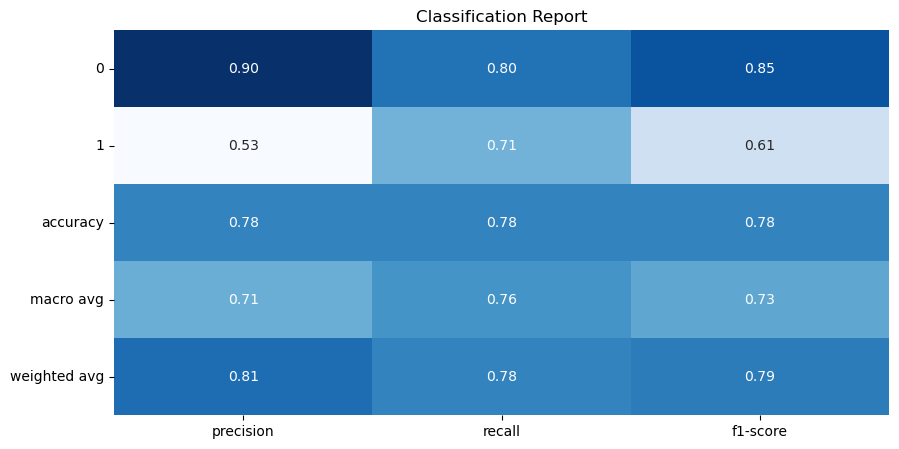

In [16]:
# Logistic Regression
# name = 'Logistic Regression'
# model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)

# print(f"Evaluating {name}")
# train_and_evaluate(name, model, X_train_smote, y_train_smote, cv, show_classification_report=True, show_roc_curve=False, show_confusion_matrix=False)

print()
print("-----------------------------")
print()
print("Logistic Regression Model")
print()


# Create and train the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
lr_model = lr.fit(X_train_smote, np.ravel(y_train_smote))

# Calculate the accuracy of the model
lr_accuracy = lr_model.score(X_test, y_test)
print ("Accuracy is {}".format(lr_accuracy))
print()
print("-----------------------------")

print()
print("Logistic Regression Model with 5-Fold Cross Validation Applied")
print()
print("-----------------------------")
print()

# Create and train the logistic regression model
lr_cv = LogisticRegressionCV(cv=cv, random_state=RANDOM_STATE).fit(X_train_smote, y_train_smote)

# Predict the labels for the test set
lr_cv_y_pred = lr_cv.predict(X_test)

# Calculate the accuracy of the model
lr_cv_accuracy = lr_cv.score(X_test, y_test)
print ("Accuracy is {}".format(lr_cv_accuracy))
print()
# Classification Report
lr_cv_report = classification_report(y_test, lr_cv_y_pred)
print("Classification Report:")
print(lr_cv_report)
print()

lr_cv_report_df = pd.DataFrame(classification_report(y_test, lr_cv_y_pred,output_dict=True)).transpose()
lr_cv_report_df = lr_cv_report_df.drop(['support'], axis=1)  # Optionally drop the 'support' column
plt.figure(figsize=(10, 5))
sns.heatmap(lr_cv_report_df, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title("Classification Report")
plt.show()

#### **5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report**


-----------------------------

Random Forest Classifier Model

Accuracy is 0.9906666666666667

-----------------------------

Random Forest Classifier Model with 5-Fold Cross Validation Applied

Accuracy is 0.9849048675571384

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.98      0.93      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000




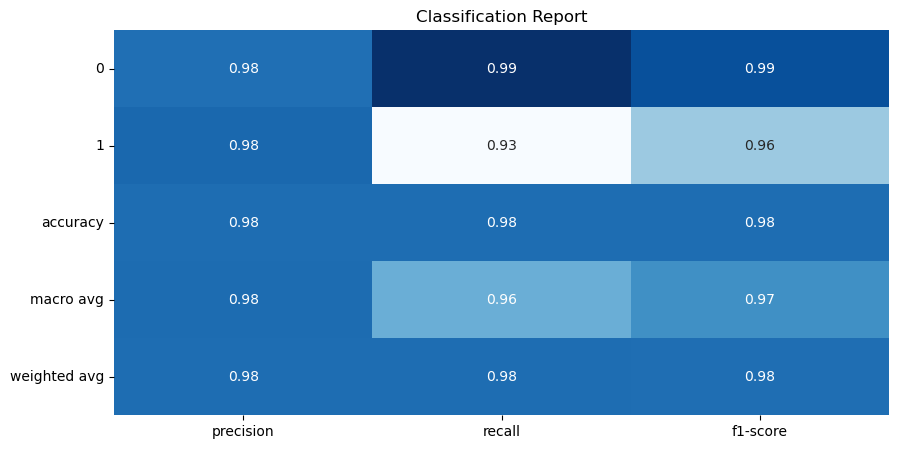

In [17]:
# Random Forest
# name = 'Random Forest'
# model = RandomForestClassifier(random_state=RANDOM_STATE)
# 
# print(f"Evaluating {name}")
# train_and_evaluate(name, model, X_train_smote, y_train_smote, cv, show_classification_report=True, show_roc_curve=False, show_confusion_matrix=False)

print()
print("-----------------------------")
print()
print("Random Forest Classifier Model")
print()

# Create and train the logistic regression model
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf_model = rf.fit(X_train_smote, np.ravel(y_train_smote))

# Calculate the accuracy of the model
rf_accuracy = rf_model.score(X_test, y_test)
print ("Accuracy is {}".format(rf_accuracy))
print()
print("-----------------------------")

print()
print("Random Forest Classifier Model with 5-Fold Cross Validation Applied")
print()

# Create and train the logistic regression model
# lr_cv = LogisticRegressionCV(cv=cv, random_state=RANDOM_STATE).fit(X_train_smote, y_train_smote)

# Predict the labels for the test set
# lr_cv_y_pred = lr_cv.predict(X_test)
# rf_cv_y_pred = cross_val_predict(rf_model, X_train, y_train, cv=cv, method='predict')
rf_cv_y_pred = cross_val_predict(rf_model, X_test, y_test, cv=cv, method='predict')

# Calculate the accuracy of the model
# lr_cv_accuracy = lr_cv.score(X_test, y_test)
# rf_cv_accuracy = np.mean(cross_val_score(rf_model, X_train, y_train, cv=cv))
rf_cv_accuracy = np.mean(cross_val_score(rf, X_train_smote, y_train_smote, cv=cv))
print ("Accuracy is {}".format(rf_cv_accuracy))
print()

# Classification Report
# print(classification_report(y_test,pred))
rf_cv_report = classification_report(y_test, rf_cv_y_pred)
print("Classification Report:")
print(rf_cv_report)
print()

rf_cv_report_df = pd.DataFrame(classification_report(y_test, rf_cv_y_pred,output_dict=True)).transpose()
rf_cv_report_df = rf_cv_report_df.drop(['support'], axis=1)  # Optionally drop the 'support' column
plt.figure(figsize=(10, 5))
sns.heatmap(rf_cv_report_df, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title("Classification Report")
plt.show()


#### **5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report**


-----------------------------

Gradient Boosting Model

Accuracy is 0.964

-----------------------------

Gradient Boosting Model with 5-Fold Cross Validation Applied

Accuracy is 0.9726666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.96      0.92      0.94       714

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000




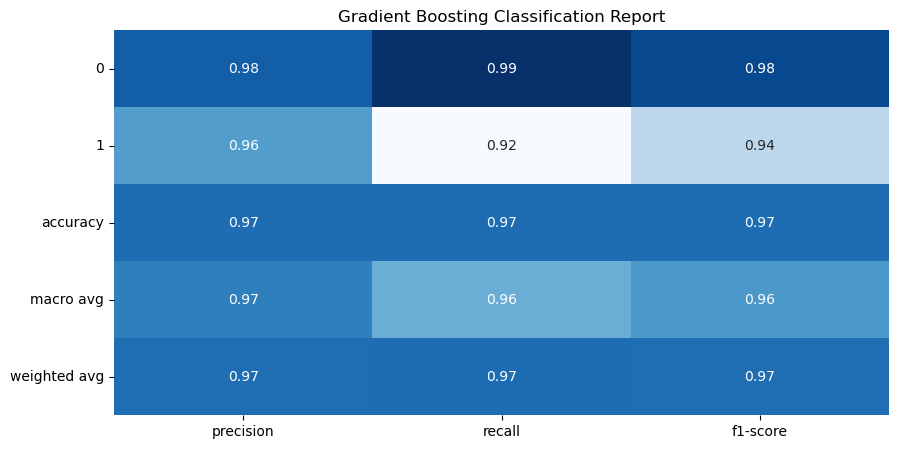

In [18]:
# Gradient Boosting
# name = 'Gradient Boosting'
# model = GradientBoostingClassifier(random_state=RANDOM_STATE)
# 
# print(f"Evaluating {name}")
# train_and_evaluate(name, model, X_train_smote, y_train_smote, cv, show_classification_report=True, show_roc_curve=False, show_confusion_matrix=False)

print()
print("-----------------------------")
print()
print("Gradient Boosting Model")
print()

# Create and train the logistic regression model
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_model = gb.fit(X_train_smote, np.ravel(y_train_smote))

# Calculate the accuracy of the model
gb_accuracy = gb_model.score(X_test, y_test)
print ("Accuracy is {}".format(gb_accuracy))
print()
print("-----------------------------")

print()
print("Gradient Boosting Model with 5-Fold Cross Validation Applied")
print()

# Predict the labels for the test set
gb_cv_y_pred = cross_val_predict(gb_model, X_test, y_test, cv=cv, method='predict')

# Calculate the accuracy of the model
gb_cv_accuracy = np.mean(cross_val_score(gb_model, X_test, y_test, cv=cv))
print ("Accuracy is {}".format(gb_cv_accuracy))
print()

# Classification Report
# print(classification_report(y_test,pred))
gb_cv_report = classification_report(y_test, gb_cv_y_pred)
print("Classification Report:")
print(gb_cv_report)
print()

gb_cv_report_df = pd.DataFrame(classification_report(y_test, gb_cv_y_pred,output_dict=True)).transpose()
gb_cv_report_df = gb_cv_report_df.drop(['support'], axis=1)  # Optionally drop the 'support' column
plt.figure(figsize=(10, 5))
sns.heatmap(gb_cv_report_df, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title("Gradient Boosting Classification Report")
plt.show()


### **6. Identify the best model and justify the evaluation metrics used**

#### **6.1.	Find the ROC/AUC for each model and plot the ROC curve**

Logistic Regression Model ROC_AUC Score is 0.8201983330515058



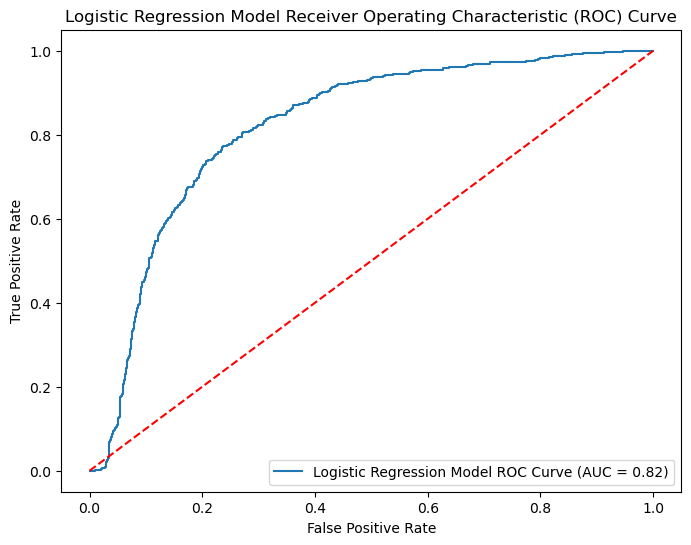


Random Forest Classifier Model ROC_AUC Score is 0.9978647679977273



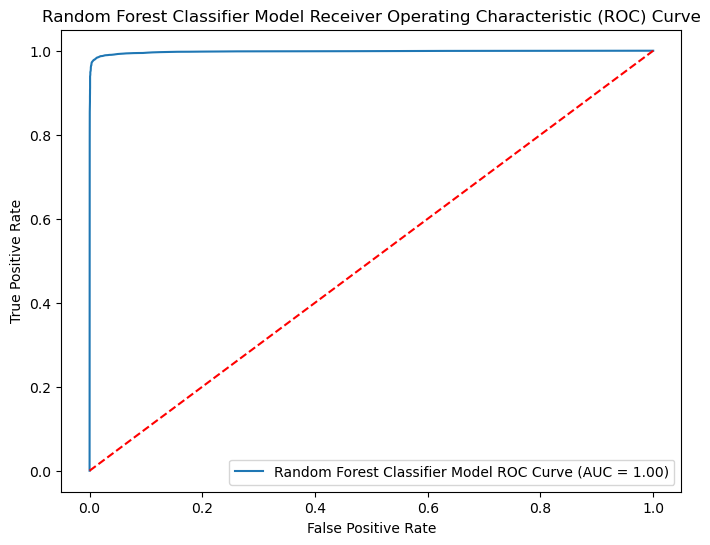


Gradient Boosting Model ROC_AUC Score is 0.9926982351092353



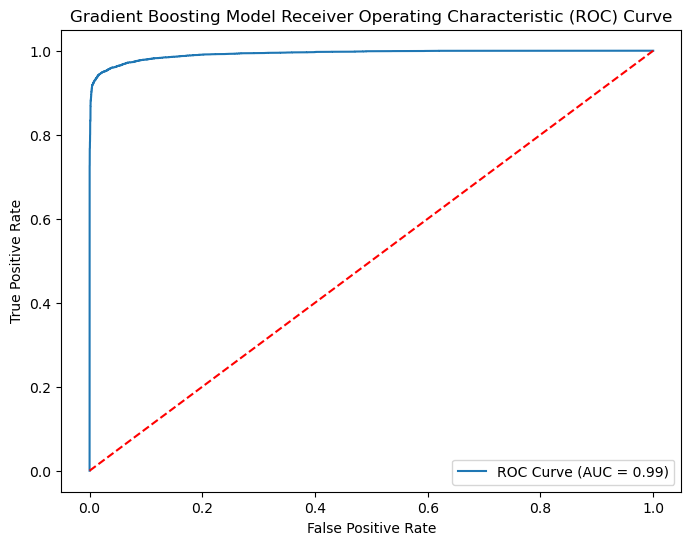

In [19]:
# Define the models
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
#     "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE)
# }

# Train and evaluate each model using the function
# for name, model in models.items():
#     print(f"Evaluating {name}")
#     train_and_evaluate(name, model, X_train_smote, y_train_smote, cv, show_classification_report=False, show_roc_curve=True, show_confusion_matrix=False)
#     print("\n" + "-"*60 + "\n")

# Logistic Regression ROC Curve
lr_cv_proba = lr_cv.predict_proba(X_test)
lr_cv_proba_class1 = lr_cv_proba[:, 1] # Probability of class 1
lr_cv_fpr, lr_cv_tpr, lr_cv_thresholds = roc_curve(y_test, lr_cv_proba_class1)
lr_cv_roc_auc = roc_auc_score(y_test, lr_cv_proba_class1)
print ("Logistic Regression Model ROC_AUC Score is {}".format(lr_cv_roc_auc))
print()

plt.figure(figsize=(8, 6))
plt.plot(lr_cv_fpr, lr_cv_tpr, label=f'Logistic Regression Model ROC Curve (AUC = {lr_cv_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression Model Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
print()

# Random Forest Classifier ROC Curve
# lr_cv_proba = lr_cv.predict_proba(X_test)
rf_y_scores = cross_val_predict(rf, X_train_smote, y_train_smote, cv=cv, method='predict_proba')[:, 1]
# rf_cv_proba_class1 = rf_cv_proba[:, 1] # Probability of class 1
rf_cv_fpr, rf_cv_tpr, rf_cv_thresholds = roc_curve(y_train_smote, rf_y_scores)
rf_cv_roc_auc = roc_auc_score(y_train_smote, rf_y_scores)
print ("Random Forest Classifier Model ROC_AUC Score is {}".format(rf_cv_roc_auc))
print()

plt.figure(figsize=(8, 6))
plt.plot(rf_cv_fpr, rf_cv_tpr, label=f'Random Forest Classifier Model ROC Curve (AUC = {rf_cv_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier Model Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
print()

# Gradient Boosting Model ROC Curve
gb_y_scores = cross_val_predict(gb, X_train_smote, y_train_smote, cv=cv, method='predict_proba')[:, 1]
gb_cv_fpr, gb_cv_tpr, gb_cv_thresholds = roc_curve(y_train_smote, gb_y_scores)
gb_cv_roc_auc = roc_auc_score(y_train_smote, gb_y_scores)
print ("Gradient Boosting Model ROC_AUC Score is {}".format(gb_cv_roc_auc))
print()

plt.figure(figsize=(8, 6))
plt.plot(gb_cv_fpr, gb_cv_tpr, label=f'ROC Curve (AUC = {gb_cv_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting Model Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
print()

#### **6.2.	Find the confusion matrix for each of the models**

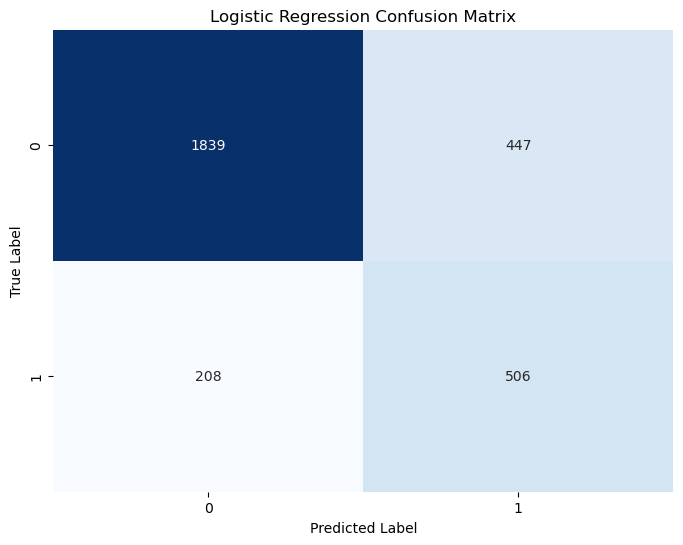


-----------------------------



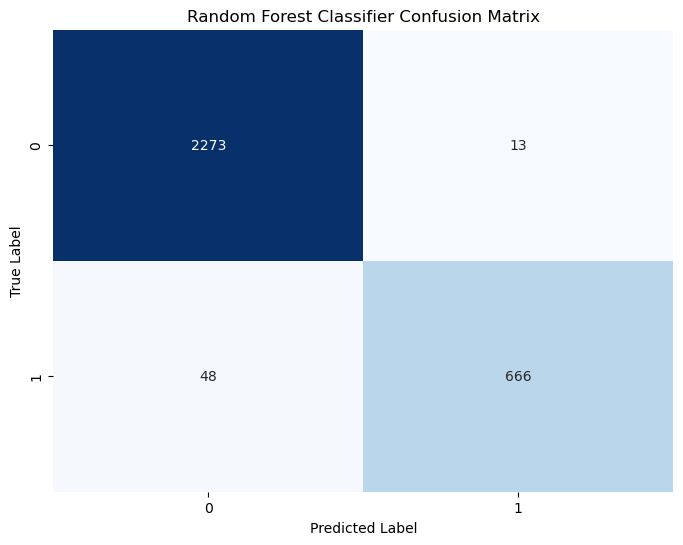


-----------------------------



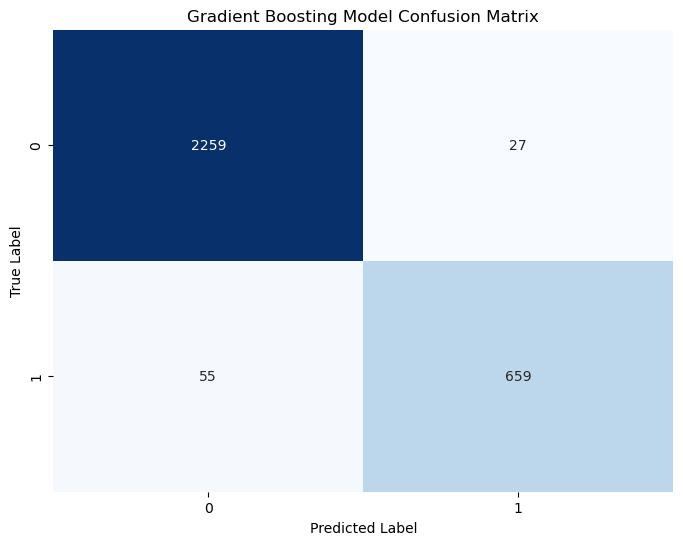


-----------------------------



In [20]:
# Define the models
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
#     "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE)
# }

# Train and evaluate each model using the function
# for name, model in models.items():
#     print(f"Evaluating {name}")
#     train_and_evaluate(name, model, X_train_smote, y_train_smote, cv, show_classification_report=False, show_roc_curve=False, show_confusion_matrix=True)
#     print("\n" + "-"*60 + "\n")

# Logistic Regression Confusion Matrix

lr_cm = confusion_matrix(y_test, lr_cv_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print()
print("-----------------------------")
print()

# Random Forest Classifier Confusion Matrix
# print(confusion_matrix(y_test,pred))
rf_cm = confusion_matrix(y_test, rf_cv_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print()
print("-----------------------------")
print()

# Gradient Boosting Model Confusion Matrix
# print(confusion_matrix(y_test,pred))
gb_cm = confusion_matrix(y_test, gb_cv_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Gradient Boosting Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print()
print("-----------------------------")
print()

#### **6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?**

**When to Use Recall or Precision?**

•	Recall is more important when:
•	The cost of missing a positive case (False Negative) is high.
•	You want to ensure that all actual positive cases are captured.
•	For example, in medical diagnostics or fraud detection, where failing to identify a positive case can have severe consequences.
•	Precision is more important when:
•	The cost of a false positive is high.
•	You want to ensure that positive predictions are highly accurate.
•	For example, in spam detection, where marking a legitimate email as spam can be problematic.

**Analysis for Employee Turnover**

For predicting employee turnover, Recall is typically more important than Precision. Here’s why:

•	Recall Focus:
•	In the context of employee turnover, it is crucial to identify all employees who are likely to leave. Missing an at-risk employee (False Negative) means missing the opportunity to intervene and potentially retain them.
•	High Recall ensures that most of the at-risk employees are identified, even if it means having some false positives (employees predicted to leave who actually don’t).
•	Precision Focus:
•	While high Precision means fewer false positives, the main priority is to ensure that all possible cases of turnover are captured, even at the expense of having more false positives.

**Conclusion**

Given the importance of identifying all employees at risk of leaving, Recall should be the primary metric to focus on in your models. Here are the Recall values from the confusion matrices:

1.	Logistic Regression:
	
    - Recall = TP / (TP + FN) = 506 / (506 + 208) ≈ 0.71
  
2.	Random Forest Classifier:

    - Recall = TP / (TP + FN) = 666 / (666 + 48) ≈ 0.93
  
3.	Gradient Boosting Classifier:

    - Recall = TP / (TP + FN) = 659 / (659 + 55) ≈ 0.92

Based on Recall, **the Random Forest Classifier performs the best in terms of identifying employees who are likely to leave**, followed closely by the Gradient Boosting Classifier. Therefore, you should prioritize the model with the highest Recall for your employee turnover prediction task.

### **7. Suggest various retention strategies for targeted employees**

#### **7.1.	Using the best model, predict the probability of employee turnover in the test data**

In [21]:
# Use the best model (Random Forest Classifier) to predict the probability of employee turnover
best_model_instance = rf  # Assuming Random Forest Classifier is the best model
best_model_instance.fit(X_train, y_train)
y_prob = best_model_instance.predict_proba(X_test)[:, 1]

#### **7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone**

- Safe Zone (Green) (Score < 20%)
- Low Risk Zone (Yellow) (20% < Score < 60%)
- Medium Risk Zone (Orange) (60% < Score < 90%)
- High Risk Zone (Red) (Score > 90%).

In [22]:
# Use the best model (Random Forest Classifier) to predict the probability of employee turnover
best_model_instance = rf  # Assuming Random Forest Classifier is the best model
best_model_instance.fit(X_train, y_train)
y_prob = best_model_instance.predict_proba(X_test)[:, 1]
y_pred = best_model_instance.predict(X_test)

# Categorize the employees into four zones
zones = pd.cut(y_prob, bins=[0, 0.2, 0.6, 0.9, 1.0], labels=['Safe Zone (Green)', 'Low Risk Zone (Yellow)', 'Medium Risk Zone (Orange)', 'High Risk Zone (Red)'], include_lowest=True)

# Handle the case where probability is 0
zones[y_prob == 0] = 'Safe Zone (Green)'

# Add the zones to the test data
test_results = X_test.copy()
test_results['Turnover Probability'] = y_prob
test_results['Risk Zone'] = zones
test_results['Actual Left'] = y_test.values
test_results['Predicted Left'] = y_pred
test_results['Correctly Predicted'] = test_results['Actual Left'] == test_results['Predicted Left']

# Display the results
display(test_results.head())



# Save the results to a CSV file if needed
# test_results.to_csv("employee_turnover_predictions.csv", index=False)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,...,sales_support,sales_technical,salary_high,salary_low,salary_medium,Turnover Probability,Risk Zone,Actual Left,Predicted Left,Correctly Predicted
10627,0.98,0.77,3,191,2,0,0,False,False,False,...,False,False,False,False,True,0.00,Safe Zone (Green),0,0,True
2703,0.76,0.93,3,271,5,0,0,False,False,False,...,False,False,False,True,False,0.52,Low Risk Zone (Yellow),0,1,False
6059,0.70,0.93,3,185,4,0,0,False,False,True,...,False,False,False,False,True,0.04,Safe Zone (Green),0,0,True
3258,0.48,0.61,3,223,3,1,0,False,False,False,...,True,False,False,False,True,0.00,Safe Zone (Green),0,0,True
4565,0.57,0.90,3,144,2,0,0,True,False,False,...,False,False,False,False,True,0.01,Safe Zone (Green),0,0,True


#### **Retention strategies**

**Safe Zone (Green):**
- *Maintain current engagement strategies and monitor periodically.*
- *Offering career development opportunities, competitive compensation, and recognizing their contributions could help retain these high-value employees.*

**Low Risk Zone (Yellow):**
- *Increase engagement and provide development opportunities to prevent any potential dissatisfaction.*
- *Offering career development opportunities, competitive compensation, and recognizing their contributions could help retain these high-value employees.*

**Medium Risk Zone (Orange):**
- *Conduct individual assessments to understand specific concerns and address them proactively.*
- *Management needs to explore ways to improve the work environment and ensure that contributions are recognized and rewarded properly.*

**High Risk Zone (Red):**
- *Implement immediate interventions, such as personal engagement, to address critical issues and prevent turnover.*
- *Conducting exit interviews or feedback sessions to understand their diverse needs and address them may help reduce turnover.*